## K-means
K-means是一种无监督聚类算法，k值为常数，需要事先设定k值，代表着将没有标注的样本分为K个簇，而聚集的过程通过样本之间的距离作为指标划分。

首先随机选取k个点为簇心，计算样本与每个簇心之间的距离，离哪一个簇心最近就分为哪一簇。使用每个簇的均值作为新的簇心，继续迭代下去，直到簇心不变。

如果簇中存在异常点，将导致均值偏差比较严重。 比如一个簇中有2、4、6、8、100五个数据，那么新的质点为24，显然这个质点离绝大多数点都比较远；在当前情况下，使用中位数6可能比使用均值的想法更好，使用中位数的聚类方式叫做K-Mediods聚类(K中值聚类)。

In [1]:
from TV_examine.algorithm import kmeans
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
def paint_pattern(a):
    figure,axes=plt.subplots(nrows=1, ncols=6, figsize=(16,4)) 
    j=0
    for i in list(itertools.combinations(range(4), 2)):
        axes[j].scatter(X[:,i[0]], X[:,i[1]], c=a)
        j+=1

## 数据生成及其分析
这里使用鸢尾花数据集测试，使用散点图绘制数据集分布

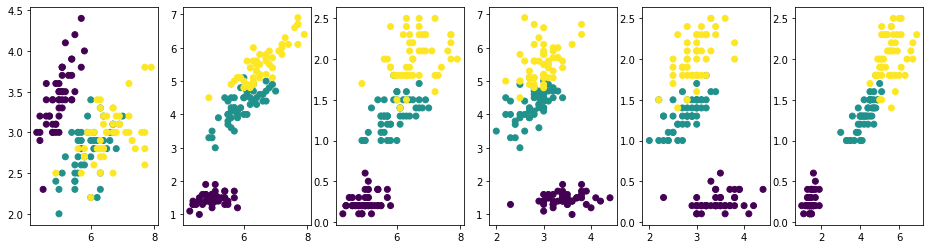

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
paint_pattern(y)

## 使用kmeans聚类算法
- 因为鸢尾花数据集有3类，因此要尝试把数据分为3个簇，令k=3训练模型
- 从结果可以看出并不理想，传统的KMeans算法的聚类结果易受到初始聚类中心点选择的影响，如果聚类中心点过近，就会导致把一个簇强行分为两个簇，如下图绿色点与紫色点。

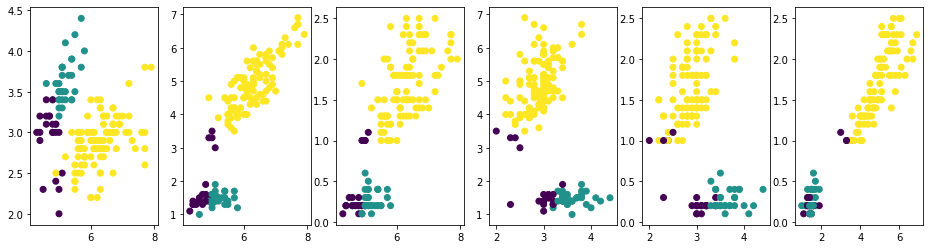

In [4]:
km = kmeans.Kmeans()
km.fit(X, 3)
X_fitted = km.data
paint_pattern(X_fitted[:,-1])

## 再次运行
再次运行，数据比较理想，与最初绘制的图比较接近，但是如果数据量比较大的话靠多次运行查看结果是很糟糕的，因此要对kmeans算法进行改进

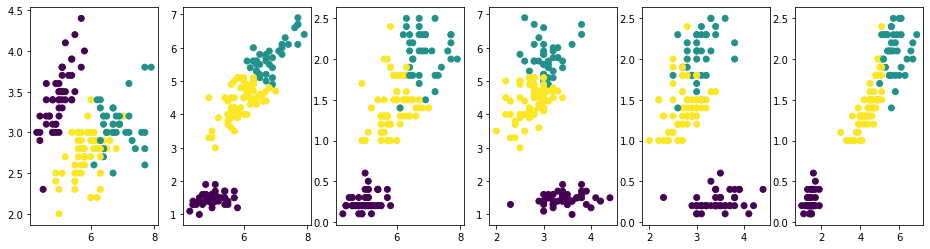

In [5]:
km = kmeans.Kmeans()
km.fit(X, 3)
X_fitted = km.data
paint_pattern(X_fitted[:,-1])

## 对比
对比sklearn中的kmeans，其实也差不多吧

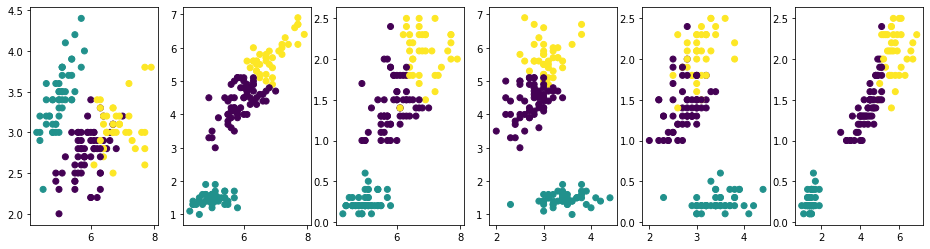

In [8]:
from sklearn.cluster import KMeans as KM_SK
km = KM_SK(n_clusters=3)
km.fit(X)
y_pr = km.labels_
paint_pattern(y_pr)

## 二分K均值算法
二分K均值算法的主要依靠SSE（误差平方和）来度量聚类效果，SSE计算可表示簇心与簇中所有点的欧氏距离之和，算法思路如下。
1. 首先令k为2，对数据集使用kmeans算法二分，然后计算每个簇的SSE
2. 选择SSE最大的簇，继续使用kmeans算法二分，直到直到簇的个数与用户输入相等时终止

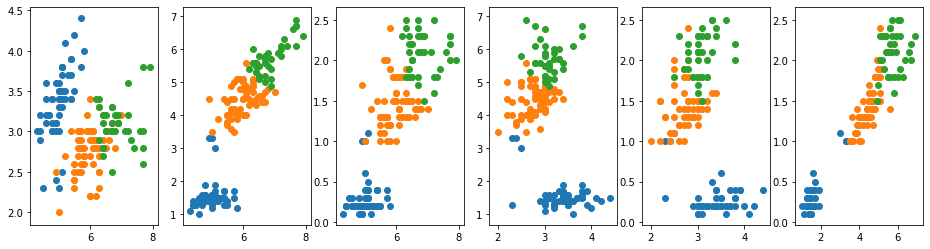

In [6]:
bkm = kmeans.BiKmeans()
result = bkm.fit(X, 3)
figure,axes=plt.subplots(nrows=1, ncols=6, figsize=(16,4)) 
for k in result.values():
    j = 0
    for i in list(itertools.combinations(range(4), 2)):
        axes[j].scatter(k[:,i[0]], k[:,i[1]])
        j+=1